In [2]:
import zarr
import xarray as xr
import matplotlib.pyplot as plt
import gzip
import pickle
import numpy as np

In [3]:
# %matplotlib notebook
from sympl import get_constant
from scipy import interpolate

with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index= pickle.load(f)

Rd = get_constant('gas_constant_of_dry_air', 'J kg^-1 K^-1')
Cp =\
    get_constant('heat_capacity_of_dry_air_at_constant_pressure',
                 'J kg^-1 K^-1')
g=get_constant('gravitational_acceleration',
                 'm s^-2') 

import os
os.chdir('/home/scratch/Abel_data/long_run2')  

Lv=2260000

lat1=6
lat2=32
lon1=15
lon2=61

common=xr.open_zarr("common",consolidated=False)
lat_rad=np.radians(common['latitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]
lon_rad=np.radians(common['longitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]

lat_deg=(common['latitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]
lon_deg=(common['longitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]

lat_diff=lat_deg[0,0]-lat_deg[1,0]
lon_diff=lon_deg[0,1]-lon_deg[0,0]

Lx=np.radians(lon_diff)*6371*1000
Ly=np.radians(lat_diff)*6371*1000

clim=xr.open_zarr("/home/scratch/Abel_data/climatology_1000",consolidated=False)
temp_clim=clim['air_temperature'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
uwind_clim=clim['eastward_wind'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
nwind_clim=clim['northward_wind'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
press_clim=clim['air_pressure'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
spress_clim=clim['surface_air_pressure'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
sens_clim=clim['surface_upward_sensible_heat_flux'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
latent_clim=clim['surface_upward_latent_heat_flux'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))

p_std = np.arange(0.1, 9.7 ,0.2)[::-1]*10000
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

# nwind_clim=interpol1d(nwind_clim, press_clim)
# uwind_clim=interpol1d(uwind_clim, press_clim)
press_int=np.insert(p_std, 0, 101300)      
dp=(press_int[:-1]-press_int[1:])

int_list=[]
dur_list=[]

for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])


u=[]
v=[]
p=[]
U=[]
V=[]
P=[]

test=0

for e in heat_index:
    
    if (dur_list[test]>=cut[4]  and dur_list[test]<=cut[5]):
    
    #     if test==10:
    #         break

#         test=test+1

        print(test)

        i=e[0]
        j=int(e[1])
    #     print(i,j)
        t_list=e[2]
        ignore=0

        for t in t_list:

    #         t=t_0+k
            D=xr.open_zarr("/home/scratch/Abel_data/long_run2/run"+str(i)+"/year"+str(j),consolidated=False)
            temp=D['air_temperature'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            uwind=D['eastward_wind'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            nwind=D['northward_wind'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            press=D['air_pressure'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            spress=D['surface_air_pressure'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            sens=D['surface_upward_sensible_heat_flux'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            latent=D['surface_upward_latent_heat_flux'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))

#             if np.min(press.values[0])<95000:
#                 ignore=1
#                 print(np.min(press.values[0]))
#                 continue

#             uwind=interpol1d(uwind, press)
#             nwind=interpol1d(nwind, press)

            u.append(uwind-uwind_clim)
            v.append(nwind-nwind_clim)
            p.append(spress-spress_clim)

        if ignore==0:
            U.append(u)
            V.append(v)
            P.append(p)
            
        u=[]
        v=[]
        p=[]
    test=test+1

with gzip.open('/home/scratch/Abel_data/wind_longv2', 'wb') as f:
    pickle.dump([U, V, P], f)

/home/data/miniconda3/lib/python3.8/site-packages/sympl/_core/dataarray.py:6: FutureWarning: xarray subclass DataArray should explicitly define __slots__
  class DataArray(xr.DataArray):


13
14
21
24
28
52
58
62
69
72
102
104
124
126
136
146
169
173
180
206
209
224
227
255
266
277
279
288
324
325
335
339
348
356
372
387
389
394
397
404
429
443
444
448
461
466
489
491
496
501
512
524
532
550
564
568
570
578
588
590
601
605
618
624
627
637
663
666
690
692
696
706
708
714
716
726
734
744
761
766
767
781
786
801
802
805
817
832
853
863
875
902
914
925
952
953
955
971
973
975
981
984
991
996
1016
1017
1021
1030
1034
1040
1046
1057
1063
1066
1069
1078
1083
1084
1108
1130
1131
1138
1145
1146
1159
1165
1170
1181
1222
1230
1237
1242
1270
1289
1298
1301
1324
1339
1340
1347
1350
1363
1374
1391
1405
1414
1423
1447
1452
1460
1470
1494
1497
1507
1516
1525
1539
1544
1564
1565
1566
1582
1598
1618
1624
1625
1631
1637
1655
1656
1666
1691
1696
1721
1732
1752
1754
1776
1784
1792
1808
1809
1812
1820
1832
1845
1846
1852
1881
1904
1905
1923
1940
1944
1947
1968
1970
1973


In [4]:
# %matplotlib notebook
from sympl import get_constant
from scipy import interpolate

with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index= pickle.load(f)

Rd = get_constant('gas_constant_of_dry_air', 'J kg^-1 K^-1')
Cp =\
    get_constant('heat_capacity_of_dry_air_at_constant_pressure',
                 'J kg^-1 K^-1')
g=get_constant('gravitational_acceleration',
                 'm s^-2') 

import os
os.chdir('/home/scratch/Abel_data/long_run2')  

Lv=2260000

lat1=6
lat2=32
lon1=15
lon2=61

common=xr.open_zarr("common",consolidated=False)
lat_rad=np.radians(common['latitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]
lon_rad=np.radians(common['longitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]

lat_deg=(common['latitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]
lon_deg=(common['longitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]

lat_diff=lat_deg[0,0]-lat_deg[1,0]
lon_diff=lon_deg[0,1]-lon_deg[0,0]

Lx=np.radians(lon_diff)*6371*1000
Ly=np.radians(lat_diff)*6371*1000

clim=xr.open_zarr("/home/scratch/Abel_data/climatology_1000",consolidated=False)
temp_clim=clim['air_temperature'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
uwind_clim=clim['eastward_wind'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
nwind_clim=clim['northward_wind'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
press_clim=clim['air_pressure'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
spress_clim=clim['surface_air_pressure'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
sens_clim=clim['surface_upward_sensible_heat_flux'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
latent_clim=clim['surface_upward_latent_heat_flux'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))

p_std = np.arange(0.1, 9.7 ,0.2)[::-1]*10000
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

# nwind_clim=interpol1d(nwind_clim, press_clim)
# uwind_clim=interpol1d(uwind_clim, press_clim)
press_int=np.insert(p_std, 0, 101300)      
dp=(press_int[:-1]-press_int[1:])

int_list=[]
dur_list=[]

for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])


u=[]
v=[]
p=[]
U=[]
V=[]
P=[]

test=0

for e in heat_index:
    
    if (int_list[test]>=cut[4]  and int_list[test]<=cut[5]):
    
    #     if test==10:
    #         break

#         test=test+1

        print(test)

        i=e[0]
        j=int(e[1])
    #     print(i,j)
        t_list=e[2]
        ignore=0

        for t in t_list:

    #         t=t_0+k
            D=xr.open_zarr("/home/scratch/Abel_data/long_run2/run"+str(i)+"/year"+str(j),consolidated=False)
            temp=D['air_temperature'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            uwind=D['eastward_wind'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            nwind=D['northward_wind'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            press=D['air_pressure'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            spress=D['surface_air_pressure'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            sens=D['surface_upward_sensible_heat_flux'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            latent=D['surface_upward_latent_heat_flux'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))

#             if np.min(press.values[0])<95000:
#                 ignore=1
#                 print(np.min(press.values[0]))
#                 continue

#             uwind=interpol1d(uwind, press)
#             nwind=interpol1d(nwind, press)

            u.append(uwind-uwind_clim)
            v.append(nwind-nwind_clim)
            p.append(spress-spress_clim)

        if ignore==0:
            U.append(u)
            V.append(v)
            P.append(p)
            
        u=[]
        v=[]
        p=[]
    test=test+1

with gzip.open('/home/scratch/Abel_data/wind_intensev2', 'wb') as f:
    pickle.dump([U, V, P], f)

5
29
66
69
75
78
108
109
113
122
124
127
142
146
167
171
173
180
186
194
214
224
226
233
247
248
249
252
277
310
314
315
329
332
334
338
345
354
356
362
368
378
393
405
412
418
419
427
445
453
466
479
496
498
507
535
545
577
584
594
599
612
615
616
633
643
666
671
690
691
706
721
736
743
751
777
780
794
798
801
802
808
809
826
832
852
853
856
872
879
888
901
903
904
909
910
927
940
949
953
971
981
984
988
989
1020
1022
1030
1052
1057
1060
1066
1069
1077
1087
1090
1092
1093
1094
1118
1123
1132
1135
1140
1150
1172
1179
1188
1203
1206
1222
1245
1246
1252
1259
1272
1273
1314
1318
1328
1331
1334
1338
1343
1369
1391
1423
1426
1437
1443
1444
1449
1463
1471
1472
1485
1496
1497
1501
1535
1544
1554
1596
1601
1608
1613
1621
1642
1661
1662
1675
1679
1697
1732
1748
1751
1758
1767
1793
1834
1836
1842
1845
1848
1852
1909
1918
1935
1938
1939
1947
1948
1951
1963
1964
1966
1970
1974


<IPython.core.display.Javascript object>


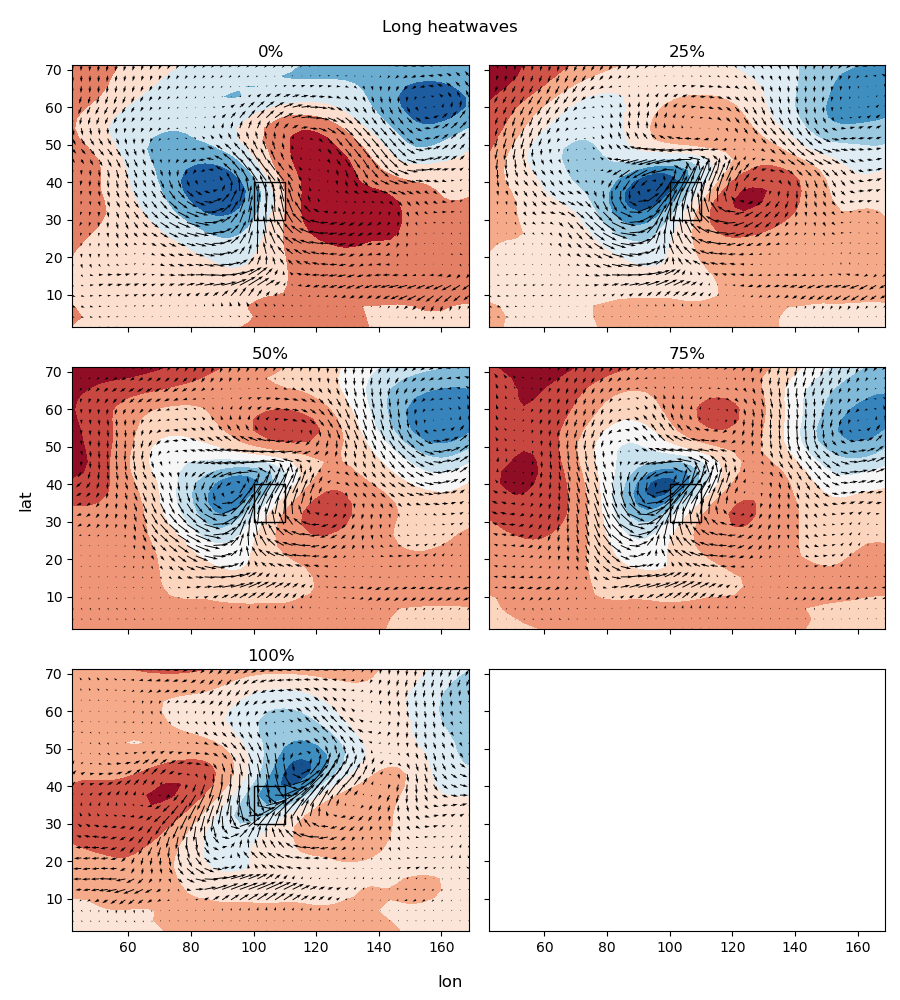

In [5]:
%matplotlib notebook
from scipy import interpolate

fig, ax = plt.subplots(3, 2, sharex=True, sharey=True)
fig.set_size_inches(9, 10)

p_std = np.arange(0.1, 9.7 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/wind_longv2', 'rb') as f:
    wind=pickle.load(f)
    
uwind=wind[0]
nwind=wind[1]
spress=wind[2]
    
lat1=6
lat2=32
lon1=15
lon2=61

import os
os.chdir('/home/scratch/Abel_data/long_run2')  
common=xr.open_zarr("common",consolidated=False)

lat_deg=(common['latitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]
lon_deg=(common['longitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]

t_std=np.array([0,0.25,0.5,0.75,1])

def intercomp(X, t):
    
    h,lt,ln=np.shape(X)
    out=np.zeros((len(t_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(t[:], X[:,i,j])
            out[:,i,j]=f(t_std)
            
    return out

u_list=[]
v_list=[]
p_list=[]

for i in range(len(uwind)):
    
    u=uwind[i]
    v=nwind[i]
    p=spress[i]
        
    u=np.array(u)
    v=np.array(v)
    p=np.array(p)
    
#     print(np.shape(u[:,0,:,:]))
    u=intercomp(u[:,0,:,:], np.linspace(0,1,len(u)))
    v=intercomp(v[:,0,:,:], np.linspace(0,1,len(v)))
    p=intercomp(p, np.linspace(0,1,len(p)))
    
    u_list.append(u)
    v_list.append(v)
    p_list.append(p)

u_mean=np.array(u_list).mean(axis=0)
v_mean=np.array(v_list).mean(axis=0)
p_mean=np.array(p_list).mean(axis=0)

import matplotlib.patches as patches

ind=0
ax[0][0].contourf(lon_deg, lat_deg, p_mean[ind], cmap='RdBu_r')
ax[0][0].quiver(lon_deg, lat_deg, u_mean[ind], v_mean[ind])
rect = patches.Rectangle((100, 30), 10, 10, linewidth=1, edgecolor='black', facecolor='none')
ax[0][0].add_patch(rect)
ax[0][0].set_title('0%')

ind=1
ax[0][1].contourf(lon_deg, lat_deg, p_mean[ind], cmap='RdBu_r')
ax[0][1].quiver(lon_deg, lat_deg, u_mean[ind], v_mean[ind])
rect = patches.Rectangle((100, 30), 10, 10, linewidth=1, edgecolor='black', facecolor='none')
ax[0][1].add_patch(rect)
ax[0][1].set_title('25%')

ind=2
ax[1][0].contourf(lon_deg, lat_deg, p_mean[ind], cmap='RdBu_r')
ax[1][0].quiver(lon_deg, lat_deg, u_mean[ind], v_mean[ind])
rect = patches.Rectangle((100, 30), 10, 10, linewidth=1, edgecolor='black', facecolor='none')
ax[1][0].add_patch(rect)
ax[1][0].set_title('50%')

ind=3
ax[1][1].contourf(lon_deg, lat_deg, p_mean[ind], cmap='RdBu_r')
ax[1][1].quiver(lon_deg, lat_deg, u_mean[ind], v_mean[ind])
rect = patches.Rectangle((100, 30), 10, 10, linewidth=1, edgecolor='black', facecolor='none')
ax[1][1].add_patch(rect)
ax[1][1].set_title('75%')

ind=4
ax[2][0].contourf(lon_deg, lat_deg, p_mean[ind], cmap='RdBu_r')
ax[2][0].quiver(lon_deg, lat_deg, u_mean[ind], v_mean[ind])
rect = patches.Rectangle((100, 30), 10, 10, linewidth=1, edgecolor='black', facecolor='none')
ax[2][0].add_patch(rect)
ax[2][0].set_title('100%')


fig.supxlabel('lon')
fig.supylabel('lat')
fig.suptitle('Long heatwaves')
plt.tight_layout()

<IPython.core.display.Javascript object>


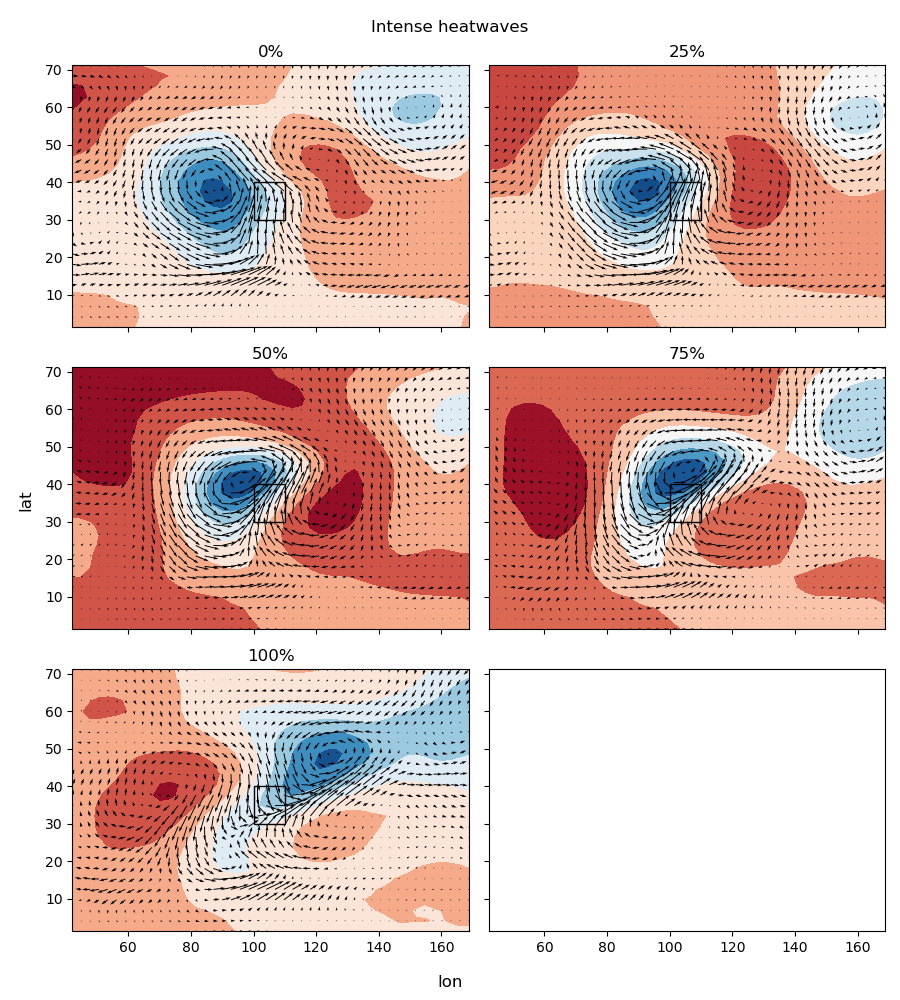

In [6]:
%matplotlib notebook
from scipy import interpolate

fig, ax = plt.subplots(3, 2, sharex=True, sharey=True)
fig.set_size_inches(9, 10)

p_std = np.arange(0.1, 9.7 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/wind_intensev2', 'rb') as f:
    wind=pickle.load(f)
    
uwind=wind[0]
nwind=wind[1]
spress=wind[2]
    
lat1=6
lat2=32
lon1=15
lon2=61

import os
os.chdir('/home/scratch/Abel_data/long_run2')  
common=xr.open_zarr("common",consolidated=False)

lat_deg=(common['latitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]
lon_deg=(common['longitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]

t_std=np.array([0,0.25,0.5,0.75,1])

def intercomp(X, t):
    
    h,lt,ln=np.shape(X)
    out=np.zeros((len(t_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(t[:], X[:,i,j])
            out[:,i,j]=f(t_std)
            
    return out

u_list=[]
v_list=[]
p_list=[]

for i in range(len(uwind)):
    
    u=uwind[i]
    v=nwind[i]
    p=spress[i]
        
    u=np.array(u)
    v=np.array(v)
    p=np.array(p)
    
#     print(np.shape(u[:,0,:,:]))
    u=intercomp(u[:,0,:,:], np.linspace(0,1,len(u)))
    v=intercomp(v[:,0,:,:], np.linspace(0,1,len(v)))
    p=intercomp(p, np.linspace(0,1,len(p)))
    
    u_list.append(u)
    v_list.append(v)
    p_list.append(p)

u_mean=np.array(u_list).mean(axis=0)
v_mean=np.array(v_list).mean(axis=0)
p_mean=np.array(p_list).mean(axis=0)

import matplotlib.patches as patches

ind=0
ax[0][0].contourf(lon_deg, lat_deg, p_mean[ind], cmap='RdBu_r')
ax[0][0].quiver(lon_deg, lat_deg, u_mean[ind], v_mean[ind])
rect = patches.Rectangle((100, 30), 10, 10, linewidth=1, edgecolor='black', facecolor='none')
ax[0][0].add_patch(rect)
ax[0][0].set_title('0%')

ind=1
ax[0][1].contourf(lon_deg, lat_deg, p_mean[ind], cmap='RdBu_r')
ax[0][1].quiver(lon_deg, lat_deg, u_mean[ind], v_mean[ind])
rect = patches.Rectangle((100, 30), 10, 10, linewidth=1, edgecolor='black', facecolor='none')
ax[0][1].add_patch(rect)
ax[0][1].set_title('25%')

ind=2
ax[1][0].contourf(lon_deg, lat_deg, p_mean[ind], cmap='RdBu_r')
ax[1][0].quiver(lon_deg, lat_deg, u_mean[ind], v_mean[ind])
rect = patches.Rectangle((100, 30), 10, 10, linewidth=1, edgecolor='black', facecolor='none')
ax[1][0].add_patch(rect)
ax[1][0].set_title('50%')

ind=3
ax[1][1].contourf(lon_deg, lat_deg, p_mean[ind], cmap='RdBu_r')
ax[1][1].quiver(lon_deg, lat_deg, u_mean[ind], v_mean[ind])
rect = patches.Rectangle((100, 30), 10, 10, linewidth=1, edgecolor='black', facecolor='none')
ax[1][1].add_patch(rect)
ax[1][1].set_title('75%')

ind=4
ax[2][0].contourf(lon_deg, lat_deg, p_mean[ind], cmap='RdBu_r')
ax[2][0].quiver(lon_deg, lat_deg, u_mean[ind], v_mean[ind])
rect = patches.Rectangle((100, 30), 10, 10, linewidth=1, edgecolor='black', facecolor='none')
ax[2][0].add_patch(rect)
ax[2][0].set_title('100%')


fig.supxlabel('lon')
fig.supylabel('lat')
fig.suptitle('Intense heatwaves')
plt.tight_layout()